**Name : Amarade Punfueng**


# 1 Document Clustering

## Question 1 [EM for Document Clustering, 40 Marks]


### I Derive Expectation and Maximization steps of the hard-EM algorithm for Document Clustering
show your work in your submitted PDF report. In particular, include all model parameters that should be learnt and the exact expression (using the same math convention that we saw in the Module 4) that should be used to update these parameters during the learning process (ie., E step, M step and assignments).

Refer to: Lecture 9 slide  , Latent Variable Models and EM textbook and http://www.alangewerc.com/blog/EM-Clustering/

Let $\varphi = (\varphi_{1},\varphi_{2},....,\varphi_{n})$ is cluster proportion


$\mu = (\mu_{1},\mu_{2},....,\mu_{n})$ is word proportion

As document clusters are not given $Z_{n}$ is latent

Proability of the observed documents is

$p(d_{1},....,d_{N}) = \prod_{n=1}^{N}\Sigma_{k=1}^{k}(\varphi_{k}\prod_{w\in{A}}\mu_{k,w}^{c(w,d_{n})}) $

Then take log-likelihood

$In p(d_{1},....,d_{N}) =  \Sigma_{n=1}^{N}In\Sigma_{k=1}^{k}(\varphi_{k}\prod_{w\in{A}}\mu_{k,w}^{c(w,d_{n})}) $

The Q function 

$Q(θ,\theta^{old})  = \Sigma_{n=1}^{N}\Sigma_{k=1}^{k}p(z_{n,l}=1|d_{n},\theta^{old})(ln\varphi_{k}+\Sigma_{w\in{A}}c(w,d_{n})ln\mu_{k,w})$


$= \Sigma_{n=1}^{N}\Sigma_{k=1}^{k}\gamma_{(z_{n,k})}(ln\varphi_{k}+\Sigma_{w\in{A}}c(w,d_{n})ln\mu_{k,w}) $


Set the derivatives to zero to maximise Q function on 2 parameters

The mixing components: $\varphi_{k} = {\dfrac{N_{k}}{N}}$

The word proporttion parameters for each cluster $\mu_{k,w} = {\dfrac{\Sigma_{n=1}^{N}\gamma(z_{n,k})c(w,d_{n})}{\Sigma_{w'\in A}\Sigma_{n=1}^{N}\gamma(z_{n,k})c(w',d_{n})}} $

EM step

Choose an initial setting for parameter $\theta^{old} = (\varphi^{old},\mu_{1}^{old},...\mu_{k}^{old}) $

While the convergence is not met:

E step: Set $\forall n, \forall k : \gamma(z_{n,k})$based of $\theta^{old} $ by

$Z^{*} \leftarrow argmax_{z}p(z_{n,k} =1 |d_{n},\theta^{old}) $


M step: Set $\theta^{new}$ based on $\forall n, \forall k : \gamma(z_{n,k}) $

$\theta^{new} = argmax_{\theta}\Sigma_{n=1}^{N}(ln\varphi_{k=Z^{*}}+\Sigma_{w\in A}c(w,d_{n})ln\mu_{k=Z^*,w})$

Setting partial derivatives to zero to solve two parameters
$\varphi_{k}^{new} = {\dfrac{N_{k}}{N}}$

and 

$\mu_{k,w}^{new} = {\dfrac{\Sigma_{n=1}^{N}\gamma(z_{n,k})c(w,d_{n})}{\Sigma_{w'\in A}\Sigma_{n=1}^{N}\gamma(z_{n,k})c(w',d_{n})}} $


Then 

$\theta^{old} 	\leftarrow \theta^{new}$ 


### II Load necessary packages.

In [1]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import PCA
from scipy.stats import multivariate_normal

import warnings #To avoid show the warnings
warnings.filterwarnings('ignore')

### III Load Task2A.txt file 
(if needed, perform text preprocessing similar to what
we did in Activity 4.2).

In [2]:
#Using the code from Activity 4.2
#Read the file (each line of the text file is one document)
with open('Task2A.txt', 'r') as file:
    text = file.readlines()
all([length == 2 for length in [len(line.split('\t')) for line in text]])
#Separate labels from articles
labels, articles = [line.split('\t')[0].strip() for line in text], [line.split('\t')[1].strip() for line in text]
docs = pd.DataFrame(data = zip(labels,articles), columns=['label', 'article'])
docs.label = docs.label.astype('category')
print(docs.shape)
docs.head()

(2373, 2)


,label,article
0,sci.crypt,ripem frequently asked questions archive name ...
1,sci.crypt,ripem frequently asked questions archive name ...
2,sci.crypt,ripem frequently noted vulnerabilities archive...
3,sci.crypt,certifying authority question answered if you ...
4,sci.crypt,rubber hose cryptanalysis some sick part of me...


In [3]:
#Instantiate a countvectorizer
cv = CountVectorizer(lowercase=True,
                     stop_words='english',
                     min_df=5) # As there are too many terms with very low frequency of occurrence, we reduce the sparcity of the feature space by filtering out very low frequency terms.

#fitting the count vectoriser and obtaining our count features
features = cv.fit_transform(raw_documents=docs.article.values)

#visualize how the features look like - very sparse as we can see
pd.DataFrame(data=features.toarray(), columns=cv.get_feature_names_out()).head()

,aa,aaron,ab,abandoned,abbreviation,abc,abdominal,abiding,ability,able,...,zimmerman,zimmermann,zinc,zip,zisfein,zmodem,zone,zoo,zoology,zv
0,0,0,0,0,0,0,0,0,0,2,...,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,2,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### IV Implement the hard-EM (you derived above) and soft-EM 
(derived in Chapter 5 of Module 4). Please provide enough comments in your submitted code. Hint: If it helps, feel free to base your code on the provided code for EM algorithm for GMM in Activity 4.1).

### Hard-EM

In [4]:
#Refer to:http://www.alangewerc.com/blog/EM-Clustering/ and code from Activity 4.1
class HardEM:
    def __init__(self, K, tau_max=20, epsilon=0.01):
        self.K = K               # number of document clusters
        self.tau_max = tau_max   # max number of iterations
        self.epsilon = epsilon  # minimum acceptable error rate
        
        self.Psi_hat = None     # placeholder for mixing ratio
        self.Nk_hat = None      # placeholder for cluster member effective counts
        self.Mu_hat = None      # placeholder for cluster means
        
    def fit(self, x):
        N = x.shape[0]
        ## initialization:
        self.Psi_hat = np.array([1/self.K] * self.K)                         # assume all clusters have the same prob (we will update this later on)
        self.Nk_hat = self.Psi_hat * N                                       
        self.Mu_hat = x[np.random.choice(N, size=self.K, replace=False)]   # randomly  choose K samples as cluster means (any better idea?)
        gamma = np.zeros((N,self.K))                                     # empty posterior matrix (the membership estimates will be stored here)        
        
        terminate= False
        tau = 1
        # fitting loop - we iteratively take E and M steps until the termination criterion is met.
        Mu_hat_old = self.Mu_hat # Mu_hat_old is used to store the last iteration value for mu_hat
        while (not terminate):
            # E step:
            for k in range(self.K):

                ## calculate the posterior based on the estimated means,covariance and cluster size:
                gamma[:,k] = self.Psi_hat[k] * multivariate_normal.pdf(x, mean=self.Mu_hat[k],cov=np.eye(x.shape[1])) #using cov=np.eye(x.shape[1]) to assume that feature are uncorrelated.

            # tranform into hard EM by choosing a single cluster for each point (i.e. max clipping)
            max_clip_function = lambda x:  np.array([1 if i== x.argmax() else 0 for i in range(len(x))])
            gamma = np.array(list(map(max_clip_function, gamma)), dtype='float32')

            # M step (note that we use the vectorised notation directly which is much better and faster than using a for loop):
            self.Nk_hat = gamma.sum(axis=0)
            self.Psi_hat = self.Nk_hat/N
            self.Mu_hat = (gamma.T @ x)/ self.Nk_hat.reshape((-1,1))

            # increase iteration counter
            tau +=1

            # check termination condition
            terminate = tau == self.tau_max or np.allclose(self.Mu_hat, Mu_hat_old, rtol= self.epsilon)
            # record the means (neccessary for checking the termination criteria)
            Mu_hat_old = self.Mu_hat

        print(f'Converged in {tau} iterations')
        
    # In a clustering-context, `predict` is equivalent to calculating cluster assignments for new data
    def predict(self, x):
        N = x.shape[0]
        gamma = np.zeros((N,self.K))
        for k in range(self.K):
            ## calculate the posterior based on the estimated means,covariance and cluster size:
            gamma[:,k] = self.Psi_hat[k] * multivariate_normal.pdf(x, mean=self.Mu_hat[k],cov=np.eye(x.shape[1]))
        
        return gamma.argmax(axis=1)

### SOFT EM

In [5]:
#Refer to:http://www.alangewerc.com/blog/EM-Clustering/ and code from Activity 4.1
class SoftEM:
    def __init__(self, K, tau_max=20, epsilon=0.01):
        self.K = K               # number of document clusters
        self.tau_max = tau_max   # max number of iterations
        self.epsilon = epsilon  # minimum acceptable error rate
        
        self.Psi_hat = None     # placeholder for mixing ratio
        self.Nk_hat = None      # placeholder for cluster member effective counts
        self.Mu_hat = None      # placeholder for cluster means
        
    def fit(self, x):
        N = x.shape[0]
        ## initialization:
        self.Psi_hat = np.array([1/self.K] * self.K)                         # assume all clusters have the same prob (we will update this later on)
        self.Nk_hat = self.Psi_hat * N                                       
        self.Mu_hat = x[np.random.choice(N, size=self.K, replace=False)]   # randomly  choose K samples as cluster means (any better idea?)
        gamma = np.zeros((N,self.K))                                     # empty posterior matrix (the membership estimates will be stored here)        
        
        terminate= False
        tau = 1
        # fitting loop - we iteratively take E and M steps until the termination criterion is met.
        Mu_hat_old = self.Mu_hat # Mu_hat_old is used to store the last iteration value for mu_hat
        while (not terminate):
            # E step:
            for k in range(self.K):

                ## calculate the posterior based on the estimated means,covariance and cluster size:
                gamma[:,k] = self.Psi_hat[k] * multivariate_normal.pdf(x, mean=self.Mu_hat[k],cov=np.eye(x.shape[1])) #using cov=np.eye(x.shape[1]) to assume that feature are uncorrelated.
            gamma = gamma/gamma.sum(axis=1,keepdims=True) # normalization (to make sure sum(gamma)=1)


            # M step (note that we use the vectorised notation directly which is much better and faster than using a for loop):
            self.Nk_hat = gamma.sum(axis=0)
            self.Psi_hat = self.Nk_hat/N
            self.Mu_hat = (gamma.T @ x)/ self.Nk_hat.reshape((-1,1))

            # increase iteration counter
            tau +=1

            # check termination condition
            terminate = tau == self.tau_max or np.allclose(self.Mu_hat, Mu_hat_old, rtol= self.epsilon)
            # record the means (neccessary for checking the termination criteria)
            Mu_hat_old = self.Mu_hat

        print(f'Converged in {tau} iterations')
        
    # In a clustering-context, `predict` is equivalent to obtaining cluster assignments for new data
    def predict(self, x):
        N = x.shape[0]
        gamma = np.zeros((N,self.K))
        for k in range(self.K):
            ## calculate the posterior based on the estimated means,covariance and cluster size:
            gamma[:,k] = self.Psi_hat[k] * multivariate_normal.pdf(x, mean=self.Mu_hat[k],cov=np.eye(x.shape[1]))
        gamma = gamma/gamma.sum(axis=1,keepdims=True) # normalization (to make sure sum(gamma)=1)
        
        return gamma

### V Set the number of clusters K=4
and run both the soft-EM and hard-EM algorithms on the provided data.

In [6]:
#Convert the features matrix to a Numpy array
X = features.toarray()

In [7]:
%%time
#HardEM model
hard_em = HardEM(K=4)
#Fit the model
hard_em.fit(X)

Converged in 20 iterations
CPU times: total: 4h 37min 55s
Wall time: 1h 14min 11s


In [8]:
%%time
#SoftEM model
soft_em = SoftEM(K=4)
#Fit the model
soft_em.fit(X)

Converged in 20 iterations
CPU times: total: 4h 46min 3s
Wall time: 1h 14min 30s


### VI Perform a PCA on the clusterings that you get based on the hard-EM and soft-EM 
in the same way we did in Activity 4.2. Then, visualize the obtained clusters with different colors where x and y axes are the first two principal components (similar to Activity 4.2). Attach the plots to your PDF report and report how and why the hard and soft-EM are different, based on your plots in the report.

In [9]:
from sklearn.preprocessing import Normalizer
#Using code from Actvity 4.2
#Normalise by dividing each feature row by its L2 norm
l2_norm = Normalizer(norm='l2')
features_normalised = l2_norm.fit_transform(features.toarray())

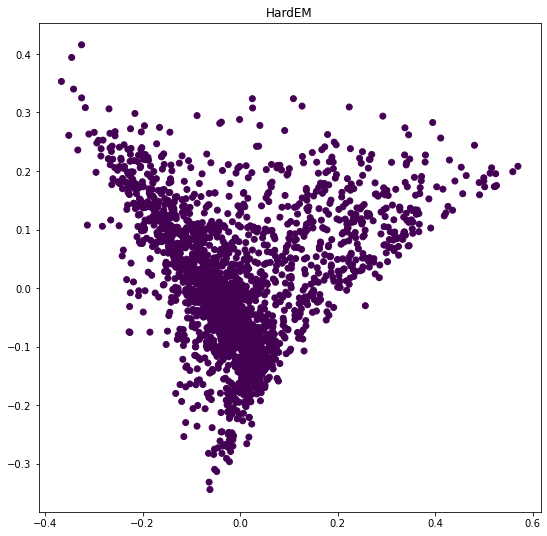

CPU times: total: 15min 5s
Wall time: 3min 54s


In [29]:
%%time
#Using similar skelaton from Activity 4.2
#Perform PCA
pca = PCA(n_components=2)
_2D_features = pca.fit_transform(features_normalised)
cluster_labels = hard_em.predict(features_normalised)
#Plot the HardEM outcome
plt.figure(figsize=(9, 9))
plt.scatter(x=_2D_features[:, 0], y=_2D_features[:, 1],c=cluster_labels)
plt.title('HardEM')
plt.show()

# 2 Perceptron vs. Neural Network [30 Marks]

## Question 2 [Neural Network’s Decision Boundary, 30 Marks]

### I Load Task2B_train.csv and Task2B_test.csv datasets, 
plot the training and testing data separately in two plots. Mark the data with different labels in different colors. Attach the plot to your PDF report submission.

In [12]:
#Load the training and testing data into pandas dataframes
train_df = pd.read_csv("Task2B_train.csv")
test_df = pd.read_csv("Task2B_test.csv")

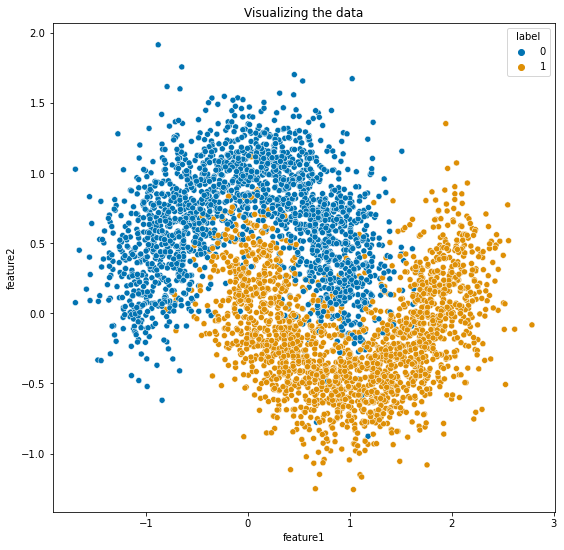

In [13]:
import seaborn as sns

#Create a scatter plot of the data using Seaborn by using the code from Activity 5.1
plt.figure(figsize=(9, 9))
ax = sns.scatterplot(data=train_df, x='feature1', y='feature2', hue='label', palette='colorblind')
sns.scatterplot(data=test_df, x='feature1', y='feature2', hue='label', palette='colorblind', legend=False,ax=ax)

#Set the title of the plot
ax.set_title('Visualizing the data')

#Show the plot
plt.show()

### II Train two Perceptron models on the loaded training data 
by setting the learning rates η to 0.1 and 1.0 respectively. Calculate the test errors of two
models and find the best η and its corresponding model, then plot the
decision boundary and the test data in one plot; attach the plot
to your PDF report. Hint: We expect the decision boundary of your
perceptron to be a linear function that separates the testing data into two
parts. You may also choose to change the labels from [0, 1] to [−1, +1] for
your convenience.

In [14]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

#Convert the labels from [0, 1] to [-1, +1]
train_df['label'] = train_df['label'].apply(lambda x: 2*x - 1)
test_df['label'] = test_df['label'].apply(lambda x: 2*x - 1)

#Define the learning rates
etas = [0.1, 1.0]

#Train two Perceptron models with different learning rates with Scikit-learn Perceptron
models = []
for eta in etas:
    model = Perceptron(eta0=eta, random_state=0)
    model.fit(train_df[['feature1', 'feature2']], train_df['label'])
    models.append(model)

#Calculate the test errors of each Learning rates
test_errors = []
i = 0
for model in models:
    y_pred = model.predict(test_df[['feature1', 'feature2']])
    test_error = 1 - accuracy_score(test_df['label'], y_pred)
    test_errors.append(test_error)
    print(f"Learning rates: {etas[i]}")
    i += 1
    print(f"Test error: {test_error}")


Learning rates: 0.1
Test error: 0.15749999999999997
Learning rates: 1.0
Test error: 0.3065


In [15]:
#Find the best model based on the lowest test error
best_model_idx = test_errors.index(min(test_errors))
best_eta = etas[best_model_idx]
best_model = models[best_model_idx]
best_test_error = test_errors[best_model_idx]
print(f"Best eta: {best_eta}")
print(f"Test error of best model: {best_test_error:.3f}")

Best eta: 0.1
Test error of best model: 0.157


Text(0, 0.5, 'feature2')

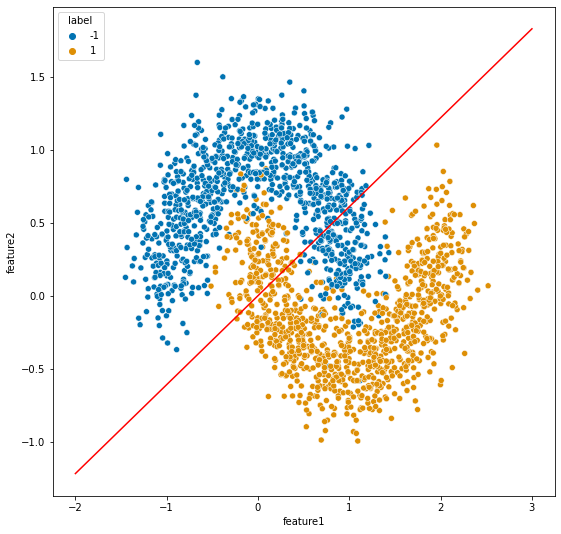

In [16]:
#Refer to https://www.codingninjas.com/codestudio/library/visualizing-decision-boundary-perceptron
#Line segment
ymin, ymax = -2, 3 #Making the decision boundary longer
w = models[best_model_idx].coef_[0] #Weight
a = -w[0] / w[1] #Calculate slope
xx = np.linspace(ymin, ymax)
yy = a * xx - (models[best_model_idx].intercept_[0]) / w[1] #Calculate y = mx + c by a is slope , (models[best_model_idx].intercept_[0]) / w[1] is intercept

#Plotting the decision boundary
plt.figure(figsize=(9, 9))
ax = plt.axes()
ax = sns.scatterplot(data=test_df, x='feature1', y='feature2', hue='label', palette='colorblind')
plt.plot(xx, yy, 'k-',color = 'red')
ax.set_xlabel('feature1')
ax.set_ylabel('feature2')


### III For each combination of K (i.e, number of units in the hidden layer) in 5, 10, 15, ..., 40, (i.e. from 5 to 40 with a step size of 5), and η (i.e., learning rate) in 0.01, 0.001 
run the 3-layer Neural Network and record testing error for
each of them. Plot the effect of different K values on the accuracy
of the testing data and attach it to your PDF report. Based on this
plot, find the best combination of K and η and obtain your best model,
then plot the decision boundary and the test data in one plot;
attach the plot to your PDF report.

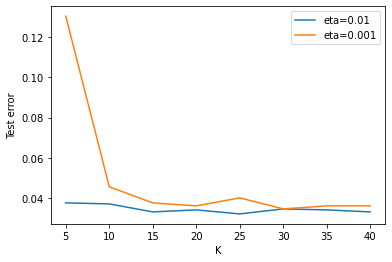

In [17]:
from sklearn.neural_network import MLPClassifier

#Define the values of K 5 to 40 with a step size of 5 and learning rate in 0.01, 0.001
Ks = range(5, 41, 5)
etas = [0.01, 0.001]

#Train neural networks with different K and eta values
test_errors = []
for K in Ks:
    for eta in etas:
        #According to the lecture, Bohan count the 1 input layer, 1 hidden layer and 1 output layer as 3 layer NN
        model = MLPClassifier(hidden_layer_sizes=(K,), learning_rate_init=eta, random_state=0,max_iter=5000)
        model.fit(train_df[['feature1', 'feature2']], train_df['label'])
        y_pred = model.predict(test_df[['feature1', 'feature2']])
        test_error = 1 - accuracy_score(test_df['label'], y_pred)
        test_errors.append((K, eta, test_error))

#Convert the test errors to a pandas dataframe for plotting line graph
test_errors_df = pd.DataFrame(test_errors, columns=['K', 'eta', 'test_error'])

#Plot the effect of different K values on the test error
fig, ax = plt.subplots()
for eta in etas:
    eta_df = test_errors_df[test_errors_df['eta'] == eta]
    ax.plot(eta_df['K'], eta_df['test_error'], label=f'eta={eta}')
ax.set_xlabel('K')
ax.set_ylabel('Test error')
ax.legend()
plt.show()

In [18]:
#Find the best model based on the lowest test error
best_model_idx = test_errors_df['test_error'].idxmin()
#Select K and learning rate based on above index
best_K = test_errors_df.loc[best_model_idx, 'K']
best_eta = test_errors_df.loc[best_model_idx, 'eta']
best_model = MLPClassifier(hidden_layer_sizes=(best_K,), learning_rate_init=best_eta, random_state=0)
best_model.fit(train_df[['feature1', 'feature2']], train_df['label'])

MLPClassifier(hidden_layer_sizes=(25,), learning_rate_init=0.01, random_state=0)

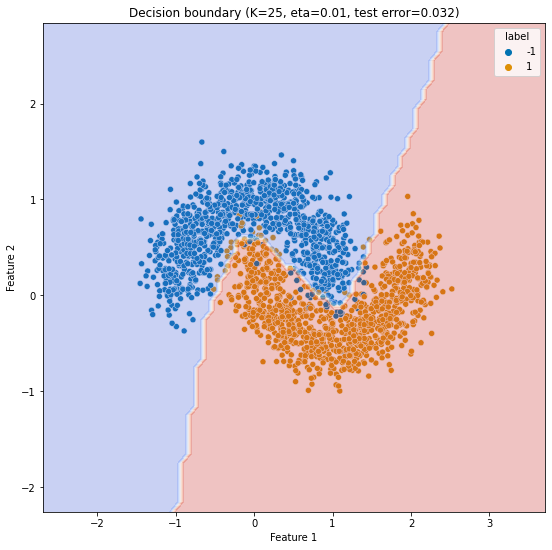

In [19]:
#Refer : https://stackoverflow.com/questions/32921268/multilayer-perceptron-visualizing-decision-boundaries-2d-in-python
#Create a uniform grid of points
x_min, x_max = train_df['feature1'].min() - 1, train_df['feature1'].max() + 1
y_min, y_max = train_df['feature2'].min() - 1, train_df['feature2'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

#Predict the labels using the best model
Z = best_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(9, 9))
ax = plt.axes()
ax = sns.scatterplot(data=test_df, x='feature1', y='feature2', hue='label', palette='colorblind')
#Plot the decision boundaries as a contour plot
plt.contourf(xx, yy, Z, cmap='coolwarm', alpha=0.3)
#Add axis labels and a title
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title(f"Decision boundary (K={best_K}, eta={best_eta}, test error={test_errors_df.loc[best_model_idx, 'test_error']:.3f})")
plt.show()

### IV In your PDF report, explain the reason(s) responsible for such difference
between Perceptron and a 3-layer Neural Network by comparing the plots
you generated in Steps II and III. Hint: Look at the plots and think about
the model assumptions.

Refer: https://stats.stackexchange.com/questions/134401/what-is-the-difference-between-a-neural-network-and-a-perceptron , https://www.turing.com/kb/explanation-of-deep-neural-network-multilayer-perceptron-deep-q-networkand https://builtin.com/machine-learning/backpropagation-neural-network

It can be seen by the Perceptron plot that it is suitable for datasets that can solve linearly separable problems. But a 3-layer Neural Network can do nonlinear decision boundaries, unlike Perceptron. Perceptron has only one layer in the model. So it can be called a single-layer neural network. Which is considered to be the simplest form. Perceptron has only feedforward but does not have Backpropagation like a 3-layer neural network. Backpropagation is feeding the error rates back through the network to update the weights between layers. So it ensures lower error rates.

----------------------

## 3 Self-Taught Learning

### I Load Task2C_labeled.csv, Task2C_unlabeled.csv, and Task2C_test.csv datasets
along with the required libraries. Note that we will use both
Task2C_labeled.csv and Task2C_unlabeled.csv to train the autoencoder, and only Task2C_labeled.csv to train the classifiers. Finally, we
will evaluate the trained classifier on the test dataset Task2C_test.csv

In [20]:
#Load the labeled_data, unlabeled_data and testing data into pandas dataframes
labeled_data = pd.read_csv('Task2C_labeled.csv')
unlabeled_data = pd.read_csv('Task2C_unlabeled.csv')
test_data = pd.read_csv('Task2C_test.csv')

#Select the feature and label data
X_labeled = labeled_data.drop('label', axis=1).values
y_labeled = labeled_data['label'].values
X_unlabeled = unlabeled_data.values
X_test = test_data.drop('label', axis=1).values
y_test = test_data['label'].values

### II Train an autoencoder with only one hidden layer 
and change the number
of its neurons to 20, 60, 100, ..., 220 (i.e. from 20 to 220 with a step size of
40).


In [21]:
#Identify neurons from 20 to 220 with a step size of 40
hidden_sizes = list(range(20, 240, 40))

In [22]:
from sklearn.neural_network import MLPRegressor
#Refer to https://github.com/scikit-learn/scikit-learn/issues/25216 and https://i-systems.github.io/teaching/ML/iNotes/15_Autoencoder.html#3.-Autoencoder-with-Scikit-Learn
trained_autoencoders = {}
for hidden_size in hidden_sizes:
    print(f"Training autoencoder with {hidden_size} neurons.")
    #Train an MLPRegressor as an autoencoder with one hidden layer
    autoencoder = MLPRegressor(hidden_layer_sizes=(hidden_size,), activation='logistic', solver='adam',max_iter=100, random_state=27)
    #Train autoencoder using labeled data
    autoencoder.fit(X_labeled, X_labeled)
    #Train autoencoder using unlabeled data
    autoencoder.fit(X_unlabeled, X_unlabeled)

Training autoencoder with 20 neurons.
Training autoencoder with 60 neurons.
Training autoencoder with 100 neurons.
Training autoencoder with 140 neurons.
Training autoencoder with 180 neurons.
Training autoencoder with 220 neurons.


### III For each model in Step II, calculate and record the reconstruction error
for the autoencoder, which is simply the average of Euclidian distances
between the input and output of the autoencoder. Plot these values where
the x-axis is the number of units in the middle layer and the y-axis is the
reconstruction error. Then, save and attach the plot to your PDF
report. Explain your findings based on the plot in your PDF
report.

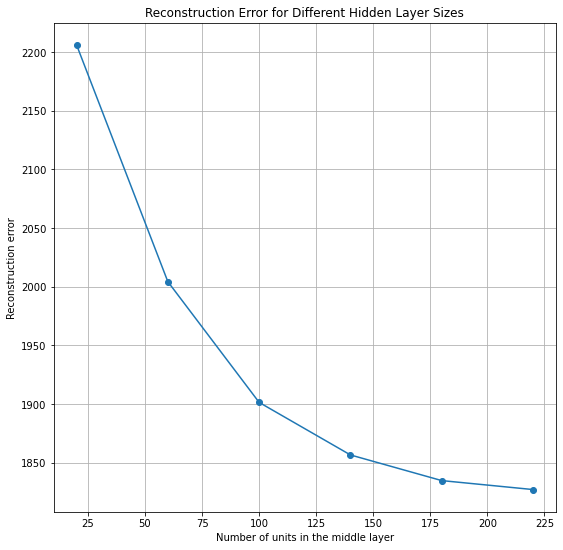

In [23]:
from scipy.spatial.distance import euclidean
#Refer to https://www.tutorialspoint.com/calculating-euclidean-distance-using-scipy
#Create empty list from reconstruction errors plot
reconstruction_errors = []
#Train the autoencoders
trained_autoencoders = {}
for hidden_size in hidden_sizes:
    #Train an MLPRegressor as an autoencoder with same method from step II
    autoencoder = MLPRegressor(hidden_layer_sizes=(hidden_size,), activation='logistic', solver='adam',max_iter=100, random_state=27)
    #Train autoencoder using labeled data
    autoencoder.fit(X_labeled, X_labeled)    
    #Train autoencoder using unlabeled data
    autoencoder.fit(X_unlabeled, X_unlabeled)
    trained_autoencoders[hidden_size] = (autoencoder)
    #Calculate reconstruction error
    labeled_data_pred = autoencoder.predict(X_labeled)
    unlabeled_data_pred = autoencoder.predict(X_unlabeled)
    
    #Create variables for reconstruction error
    reconstruction_error_labeled = 0.0
    reconstruction_error_unlabeled = 0.0

    #Calculate euclidian distances by using zip() to pair two variable
    #Label dataset
    for original, reconstructed in zip(X_labeled, labeled_data_pred):
        reconstruction_error_labeled += euclidean(original, reconstructed)
    #Unlabel dataset
    for original, reconstructed in zip(X_unlabeled, unlabeled_data_pred):
        reconstruction_error_unlabeled += euclidean(original, reconstructed)    
    #Combined to two reconstruction error and divide by sum of datapoint to show average of reconstruction error
    reconstruction_error = (reconstruction_error_labeled + reconstruction_error_unlabeled) / (len(X_labeled) + len(X_unlabeled))    
    reconstruction_errors.append(reconstruction_error)   
    
#Plot reconstruction errors
plt.figure(figsize=(9, 9))
plt.grid(True)
plt.plot(hidden_sizes, reconstruction_errors, marker='o')
plt.xlabel('Number of units in the middle layer')
plt.ylabel('Reconstruction error')
plt.title('Reconstruction Error for Different Hidden Layer Sizes')
plt.show()

It can be seen that the reconstruction error keeps decreasing when the number of units in the middle layer increases. It might be because the number of units in the middle layer increases. The network has more parameters to learn.

### IV Build the 3-layer NN to build a classification model 
using all the original attributes from the training set and change the number of its neurons to 20, 60, 100, ..., 220 (i.e. from 20 to 220 with a step size of 40). For each model, calculate and record the test error.

In [24]:
from sklearn.metrics import accuracy_score
#Train the classifiers
trained_classifiers = {}
for hidden_size in hidden_sizes:
    #According to the lecture, Bohan count the 1 input layer, 1 hidden layer and 1 output layer as 3 layer NN
    NNclassifier = MLPClassifier(hidden_layer_sizes=(hidden_size,), activation='logistic', solver='adam',max_iter=100, random_state=27)
    NNclassifier.fit(X_labeled, y_labeled)
    trained_classifiers[hidden_size] = NNclassifier
#Calculate the test errors
test_errors_nn = {}
for hidden_size, NNclassifier in trained_classifiers.items():
    y_pred = NNclassifier.predict(X_test)
    test_error = 1 - accuracy_score(y_test, y_pred)
    test_errors_nn[hidden_size] = test_error
#Print the test errors
for hidden_size, test_error in test_errors_nn.items():
    print(f"Test error for {hidden_size} neurons in the hidden layer: {test_error:.4f}")

Test error for 20 neurons in the hidden layer: 0.6720
Test error for 60 neurons in the hidden layer: 0.4900
Test error for 100 neurons in the hidden layer: 0.4340
Test error for 140 neurons in the hidden layer: 0.4020
Test error for 180 neurons in the hidden layer: 0.3920
Test error for 220 neurons in the hidden layer: 0.4100


### V Build augmented self-taught networks using the models learnt in Step II.
For each model: 1) add the output of the middle layer of an autoencoder
as extra features to the original feature set; 2). Train a new 3-layer Neural
Network using all features (original + extra) and varying the number of
hidden neurons (like Step IV) as well. Then calculate and record the test
error. For example, each model should be developed as follows: Model 1:
20 hidden neurons + extra 20 features (from an autoencoder), Model 2: 60
hidden neurons + extra 60 features (from an autoencoder), ..., Model 5:
220 hidden neurons + extra 220 features (from an autoencoder).



In [25]:
#Create dictionary to store the augmented features
augmented_features = {}
#Extract the hidden layer outputs from the autoencoders
for hidden_size, encoder in trained_autoencoders.items():
    labeled_hidden_output = encoder.predict(X_labeled)
    unlabeled_hidden_output = encoder.predict(X_unlabeled)    
    hidden_layer_output = np.concatenate((labeled_hidden_output, unlabeled_hidden_output))
    augmented_features[hidden_size] = hidden_layer_output

#Train the augmented self-taught networks
trained_augmented_networks = {}
for hidden_size, hidden_layer_output in augmented_features.items():    
    #Add the extra features from the autoencoder to the original feature set
    augmented_X_labeled = np.hstack((X_labeled, hidden_layer_output[:len(X_labeled)]))
    augmented_X_test = np.hstack((X_test, hidden_layer_output[len(X_labeled):][:X_test.shape[0]]))    

    #Train a new 3-layer NN with the augmented features
    #According to the lecture, Bohan count the 1 input layer, 1 hidden layer and 1 output layer as 3 layer NN
    NNclassifier = MLPClassifier(hidden_layer_sizes=(hidden_size,), activation='logistic', solver='adam',max_iter=100, random_state=27)
    NNclassifier.fit(augmented_X_labeled, y_labeled)    
    #Store the trained classifier
    trained_augmented_networks[hidden_size] = NNclassifier

#Calculate the test errors
test_errors = {}
for hidden_size, NNclassifier in trained_augmented_networks.items():
    augmented_X_test = np.hstack((X_test, augmented_features[hidden_size][len(X_labeled):][:X_test.shape[0]]))
    y_pred = NNclassifier.predict(augmented_X_test)
    test_error = 1 - accuracy_score(y_test, y_pred)
    test_errors[hidden_size] = test_error

#Print the test errors
for hidden_size, test_error in test_errors.items():
    print(f"Test error for {hidden_size} hidden neurons with augmented features: {test_error:.4f}")

Test error for 20 hidden neurons with augmented features: 0.6140
Test error for 60 hidden neurons with augmented features: 0.4760
Test error for 100 hidden neurons with augmented features: 0.4340
Test error for 140 hidden neurons with augmented features: 0.4460
Test error for 180 hidden neurons with augmented features: 0.4180
Test error for 220 hidden neurons with augmented features: 0.4040


### VI Plot the error rates for the 3-layer neural networks from Step IV and the augmented self-taught networks from Step V
while the x-axis is the number
of hidden neurons and y-axis is the classification error. Save and attach
the plot to your PDF report. In your pdf, explain how the performance
of the 3-layer neural networks and the augmented self-taught networks is
different and why they are different or why they are not different, based on
the plot.

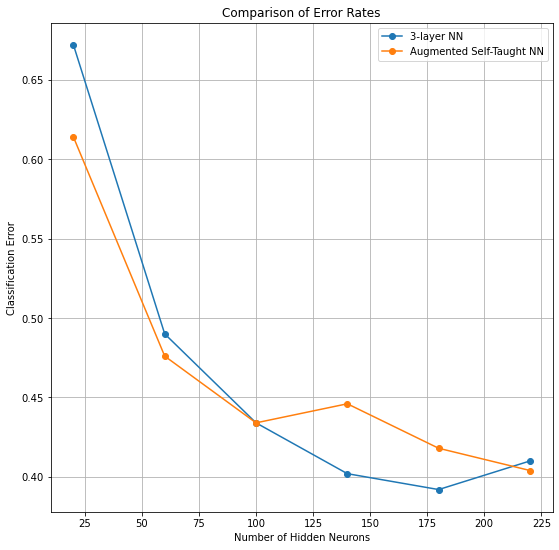

In [26]:
#Using the error rates from the 3-layer neural networks
nn_error_rates = list(test_errors_nn.values())
#Using the error rates from the augmented self-taught networks
augmented_nn_error_rates = list(test_errors.values())
#Plot the error rates
plt.figure(figsize=(9, 9))
plt.grid(True)
plt.plot(hidden_sizes, nn_error_rates, marker='o', label='3-layer NN')
plt.plot(hidden_sizes, augmented_nn_error_rates, marker='o', label='Augmented Self-Taught NN')
plt.xlabel('Number of Hidden Neurons')
plt.ylabel('Classification Error')
plt.title('Comparison of Error Rates')
plt.legend()
plt.show()

It can be seen both performances are not different that much. At the start, both performances are quite similar until around 125 to 175 hidden neurons, and the performance of the Augmented Self-Taught neural network is worse. But the overall trend is quite similar. Because the three-layer neural network performance is already good or the dataset has an easy pattern to understand, Augmented Self-Taught neural network will not improve performance much.